In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2020", "DEN")
print(data.head())
one_match = extract_one_match(data, 1)


   frame_team  Time [s]_team half_team  home_1_x  home_1_y  home_2_x  \
0           0           0.00        1H     53.02     -0.48       NaN   
1           1           0.04        1H     52.98     -0.48       NaN   
2           2           0.08        1H     52.94     -0.48       NaN   
3           3           0.12        1H     52.89     -0.48       NaN   
4           4           0.16        1H     52.85     -0.48       NaN   

   home_2_y  home_3_x  home_3_y  home_4_x  ...  away_26_x  away_26_y  \
0       NaN     16.78    -10.19     18.46  ...        NaN        NaN   
1       NaN     16.77    -10.20     18.48  ...        NaN        NaN   
2       NaN     16.77    -10.21     18.49  ...        NaN        NaN   
3       NaN     16.77    -10.23     18.51  ...        NaN        NaN   
4       NaN     16.77    -10.24     18.53  ...        NaN        NaN   

   away_25_x  away_25_y  away_17_x  away_17_y  away_23_x  away_23_y  \
0        NaN        NaN        NaN        NaN        NaN       

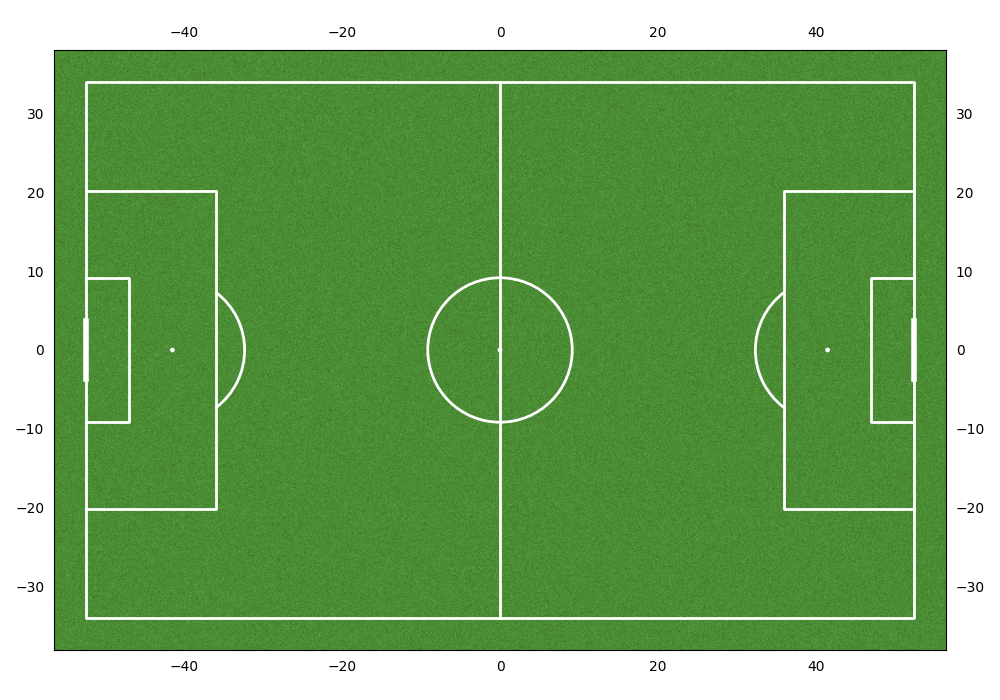

In [3]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [4]:
index_displayer = None

In [5]:
if (len(interactive_pitch.vectors) < 1):
    index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [6]:
from libs.similar_movement import *
if (len(interactive_pitch.vectors) > 0):
    distance_index_list = find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0] , interactive_pitch.similar_situation_indices )
else:
    distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

32343
38029
32391
38077
32439
38125
32487
38173
32535
32583
38221
38269
32631


In [7]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [8]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])

In [9]:
print(distance_index_list[0][0]) 
print(distance_index_list)

426.6415730410329
[(426.6415730410329, np.int64(38269)), (448.9429914893647, np.int64(38221)), (586.6242664518352, np.int64(32631)), (606.411466260635, np.int64(32583)), (1897.0471786835078, np.int64(38173)), (2030.179101335321, np.int64(32535)), (2075.9010650777036, np.int64(32391)), (2075.949512684881, np.int64(32439)), (2075.971747229376, np.int64(32343)), (2076.002145681519, np.int64(32487)), (2078.264001073324, np.int64(38125)), (2078.311205678132, np.int64(38029)), (2078.340325844443, np.int64(38077))]


In [10]:
from libs.Video_Player import *

In [11]:

initial_index = index_displayer_2.get_selected_index()  
initial_time = one_match.iloc[initial_index]['Time [s]'] 

video_player = VideoPlayer(video_path="/data/video/EURO2020Russia_vs_Denmark_1st_Half_769630.mp4", video_offset=52, distance_index_list=distance_index_list)
video_player.start(initial_time)


Initial Time: 1530.76 seconds
